In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('ks-projects-201801.csv')
data.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


As the goal here is to analyze the titles, it is possible that British vs American spellings can create confusion. For the purposes of this dataset, the two will be treated separately. 

In [3]:
data_US = data[data['country'] == 'US']
data_GB = data[data['country'] == 'GB']

In [4]:
data_US.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.0
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.0


In [5]:
data_US.shape

(292627, 15)

In [6]:
data_GB.shape

(33672, 15)

First some initial data exploration.

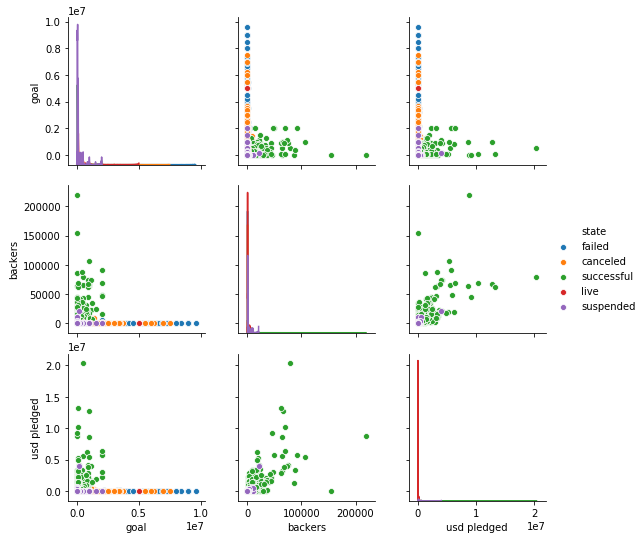

In [88]:
"""
g = sns.pairplot(data_US[['goal', 'backers', 'usd pledged', 'state']], hue='state',diag_kind='kde')
for i in range(0, len(g.axes)):
    for j in range(0, len(g.axes[0])):
        g.axes[i,j].set(yscale='log', xscale='log')
"""
sns.pairplot(data_US[data_US['goal'] < 1e7][['goal', 'backers', 'usd pledged', 'state']], hue='state',diag_kind='kde')
plt.savefig('pairplot.png', dpi=300)
plt.show()

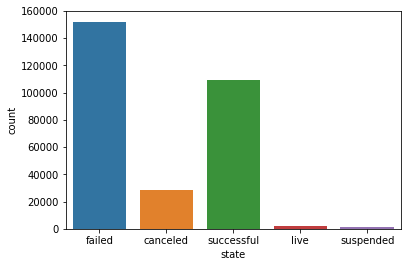

In [8]:
sns.countplot(data_US['state'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

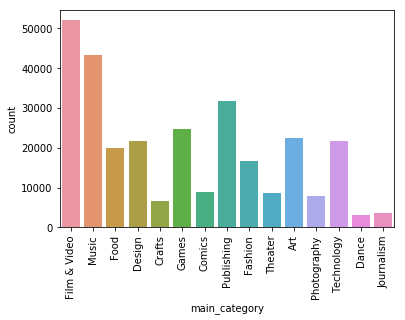

In [7]:
sns.countplot(data_US['main_category'])
plt.xticks(rotation=90)

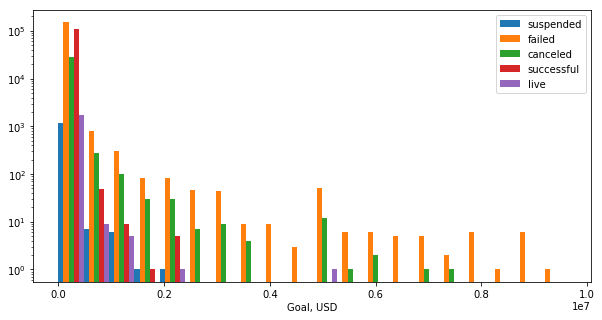

In [93]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
i = 0
plt.figure(figsize=(10,5))
lists = []
data_cut = data_US[data_US['goal'] < 1e7][['goal', 'backers', 'usd pledged', 'state']]
for state in set(data_US['state']):
    lists.append(data_cut[data_cut['state'] == state]['goal'].tolist())
    #c = colors[i]
    i += 1
    #plt.hist(data_US[data_US['state'] == state]['goal'],bins=50, alpha=0.25, color=c)
    #plt.ylim((0,100))
    #plt.yscale('log')
plt.hist(lists, bins=20, label=list(set(data_US['state'])), rwidth=1)
plt.legend()
plt.yscale('log')
plt.xlabel('Goal, USD')
plt.savefig('Goal_hist.png', dpi=300)
plt.show()

(0, 100)

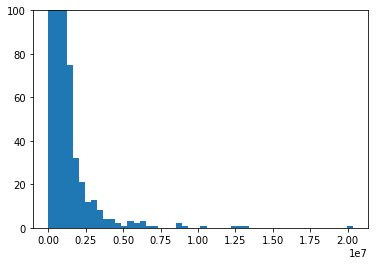

In [48]:
plt.hist(data_US[data_US['goal'] < 0.2e8]['pledged'],bins=50)
plt.ylim((0,100))

In [95]:
data_cut.shape[0]/data_US.shape[0]

0.9994976540100537

It appears that for the numeric columns, there are severe outliers in the data likely revealing overly optimistic projects or runaway successes. The dataset does have a nice distribution of categories. Next, the bag of words is implemented.

### Predicting categories from LSA

In [6]:
lower = lambda x: x.lower() if type(x) == str else x
data_US['lower'] = [lower(x) for x in data_US['name']] # make all titles lowercase

C:\Users\rwalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data_US['lower']

1             greeting from earth: zgac arts capsule for et
2                                            where is hank?
3         toshicapital rekordz needs help to complete album
4         community film project: the art of neighborhoo...
5                                      monarch espresso bar
6         support solar roasted coffee & green energy!  ...
7         chaser strips. our strips make shots their b*tch!
8         spin - premium retractable in-ear headphones w...
9         studio in the sky - a documentary feature film...
11                                         lisa lim new cd!
12                                       the cottage market
13        g-spot place for gamers to connect with eachot...
15                                           survival rings
16                                                the beard
17                         notes from london: above & below
18                      mike corey's darkness & light album
19                                      

In [99]:
# stop words are chosen based on the standard 'english' list, but with a few removed such as gendered pronouns which might be 
# important
stopwords = ['between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 
             'having', 'with', 'an', 'be', 'some', 'for', 'do', 'its', 'such', 'into', 'of', 'most', 
             'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'each', 'the', 'themselves', 'until', 
             'below', 'are', 'these', 'through', 'don', 'nor', 'were', 'more', 
             'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'all', 'no', 
             'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 
             'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'you', 
             'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 
             'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']

In [13]:
data_US.shape

(292627, 16)

In [102]:
data_US = data_US.dropna(subset=['name'])

In [103]:
countvector = TfidfVectorizer(stop_words=stopwords)

In [104]:
bow_US = countvector.fit_transform(data_US['name'])

C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [11]:
len(countvector.get_feature_names())/data_US.shape[0]

0.38858740226365573

In [12]:
bow_US.shape

(292624, 113710)

In [105]:
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(bow_US)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=5,
       random_state=None, tol=0.0)

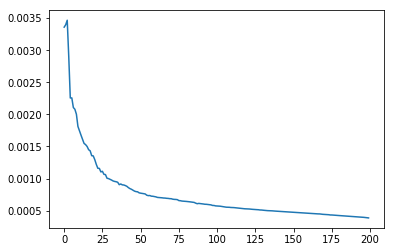

In [73]:
plt.plot(tsvd.explained_variance_ratio_)

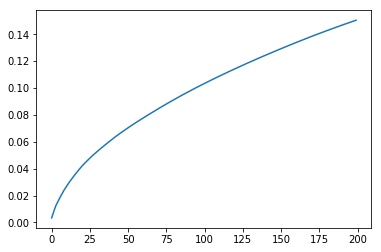

In [74]:
plt.plot(tsvd.explained_variance_ratio_.cumsum())

In this case, TruncatedSVD was used (also called LSA for text data) in order to get visualizations and to do the eventual machine learning. 

In [106]:
lsa = tsvd.transform(bow_US)
lsa[0].shape

(200,)

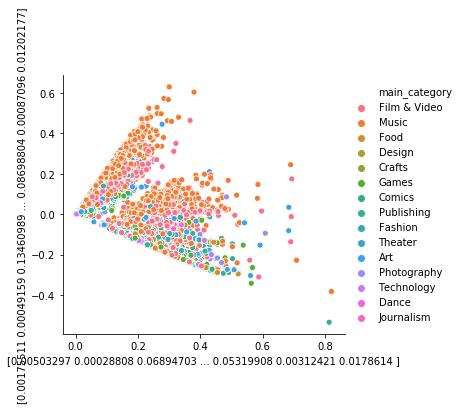

In [22]:
sns.relplot(x=lsa[:,0], y=lsa[:,1], hue=data_US['main_category'], data=data_US)

In [116]:
data_US.shape
len(set(data_US['main_category']))
cmap(0.1)

(0.282623, 0.140926, 0.457517, 1.0)

In [118]:
cmap = plt.cm.viridis
colors = []
for i, cat in enumerate(set(data_US['main_category'])):
    for j in data_US['main_category']:
        if j == cat:
            colors.append(cmap(i/15))
    

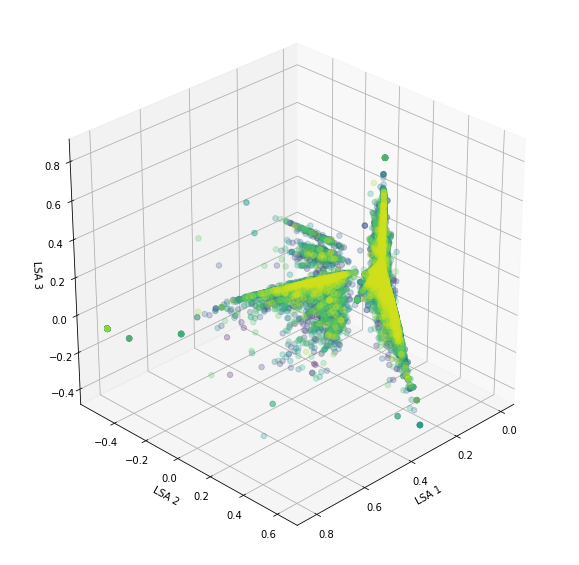

In [124]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Dataset
# plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lsa[:,0], lsa[:,1], lsa[:,2], c=colors, s=30, alpha=0.25)
ax.set_xlabel('LSA 1')
ax.set_ylabel('LSA 2')
ax.set_zlabel('LSA 3')
ax.view_init(30, 45)
plt.savefig('LSAPlot.png', dpi=300)
plt.show()


In [126]:
from sklearn.cross_validation import train_test_split

C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [127]:
y = data_US['main_category']
X = lsa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
model = RandomForestClassifier(n_estimators=20, max_features='auto', min_samples_leaf=10, min_samples_split=20, random_state=42,
                              criterion='entropy')
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [134]:
from sklearn.metrics import accuracy_score, classification_report

In [135]:
accuracy_score(y_test, predictions)

0.5138454528508999

In [136]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         Art       0.46      0.33      0.38      7324
      Comics       0.81      0.38      0.51      2907
      Crafts       0.49      0.10      0.17      2175
       Dance       0.75      0.31      0.44      1074
      Design       0.41      0.37      0.39      7198
     Fashion       0.62      0.46      0.53      5514
Film & Video       0.41      0.74      0.52     17071
        Food       0.59      0.62      0.60      6618
       Games       0.63      0.54      0.58      8239
  Journalism       0.38      0.01      0.02      1179
       Music       0.70      0.72      0.71     14271
 Photography       0.67      0.19      0.30      2670
  Publishing       0.46      0.42      0.44     10410
  Technology       0.47      0.43      0.45      7045
     Theater       0.60      0.28      0.38      2871

 avg / total       0.54      0.51      0.50     96566



A 51% accuracy for an un-optimized model is ok, in the future a  more exhaustive optimization would likely provide better results. For now I will move on to the next point of enquiry, is there any information in the titles which would be related to their success rate. For this, classification will be done as either success or nothing. The LSA features will be used in addition to category and the "goal" column, since these would be known at the start of a campaign.

### Predicting state from other variables

First, the LSA alone were tested

In [140]:
y = data_US['state']
X = lsa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
model = RandomForestClassifier(n_estimators=20, max_features='auto', min_samples_leaf=10, min_samples_split=20, random_state=42,
                              criterion='entropy')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [142]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.6110846467700847
             precision    recall  f1-score   support

   canceled       1.00      0.63      0.77      9323
     failed       0.60      0.80      0.69     50111
       live       0.00      0.00      0.00       614
 successful       0.54      0.35      0.43     36127
  suspended       0.98      0.55      0.70       391

avg / total       0.61      0.61      0.59     96566



C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Next, the other data columns were incorporated

In [30]:
data_US.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'lower'],
      dtype='object')

The other columns in the database still need to be treated. Of these, goal will be taken in as is, category and main_category will be converted to dummy variables, currency, deadline, pledged, backers, country, usd_pledged, usd_pledges_real, usd_goal_real, and lower will be dropped, and launched will be converted to an ordinal column 

In [48]:
for x in data_US['launched']:
    if type(x) != str:
        print(x)

In [53]:
# Drop the columns we don't want
X = data_US[['category', 'main_category', 'goal', 'launched']].copy()
y = data_US['state']

print('Turn category and main_category into dummy variables')

for x in ('category', 'main_category'):
    dummies = pd.get_dummies(X[x])
    X = pd.concat((X.drop(x, axis=1),dummies), axis=1)

print ('turn launched into ordinal')
toordinal = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").toordinal()
X['launched'] = [toordinal(x) for x in X['launched']]

print ('scale the data')
X = pd.DataFrame(StandardScaler().fit_transform(X), index=data_US.index)

print ('add back in the lsa')
X = pd.concat((X, pd.DataFrame(lsa, index = X.index)), axis=1)

print(X.shape)

Turn category and main_category into dummy variables
turn launched into ordinal
scale the data
add back in the lsa
(292624, 376)


Now for the final challenge, see if the final state of the projects can be predicted

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
model = RandomForestClassifier(n_estimators=20, max_features='auto', min_samples_leaf=50, min_samples_split=200, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [60]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.6521032247374853
             precision    recall  f1-score   support

   canceled       0.99      0.62      0.77      9323
     failed       0.63      0.85      0.72     50111
       live       1.00      0.00      0.01       614
 successful       0.64      0.40      0.49     36127
  suspended       0.98      0.33      0.49       391

avg / total       0.67      0.65      0.63     96566



In [61]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.695809403339828
0.6521032247374853


Considering the minimal optimization, a score of 65% is pretty good. Lastly, the usefullness of the LSA will be tested by looking at a model trained on all columns except the LSA columns.

In [62]:
X = data_US[['category', 'main_category', 'goal', 'launched']].copy()
y = data_US['state']

print('Turn category and main_category into dummy variables')

for x in ('category', 'main_category'):
    dummies = pd.get_dummies(X[x])
    X = pd.concat((X.drop(x, axis=1),dummies), axis=1)

print ('turn launched into ordinal')
toordinal = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").toordinal()
X['launched'] = [toordinal(x) for x in X['launched']]

print ('scale the data')
X = pd.DataFrame(StandardScaler().fit_transform(X), index=data_US.index)

print(X.shape)

Turn category and main_category into dummy variables
turn launched into ordinal
scale the data
(292624, 176)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(n_estimators=20, max_features='auto', min_samples_leaf=50, min_samples_split=200, random_state=42)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

print(classification_report(y_test, test_pred))

0.6071672668292036
0.6030901145330655
             precision    recall  f1-score   support

   canceled       0.00      0.00      0.00      9323
     failed       0.60      0.80      0.69     50111
       live       0.86      0.77      0.81       614
 successful       0.60      0.48      0.53     36127
  suspended       0.00      0.00      0.00       391

avg / total       0.54      0.60      0.56     96566



C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Interestingly, the model is now unable to find any canceled projects or suspended ones but is doing almost as well for failed and succesful projects.

Now for a function to unify the data prep, with 'lsa' as an option.

In [95]:
def data_prep(data, do_lsa=True):
    data_out = data.dropna(subset=['name'])
    
    if do_lsa:
        lower = lambda x: x.lower() if type(x) == str else x
        data_out['lower'] = [lower(x) for x in data_out['name']] # make all titles lowercase
        countvector = TfidfVectorizer(stop_words=stopwords)
        bow = countvector.fit_transform(data_out['name'])
        tsvd = TruncatedSVD(n_components=200)
        lsa = tsvd.fit_transform(bow)
    
    X = data_out[['category', 'main_category', 'goal', 'launched']].copy()
    y = data_out['state']

    print('Turn category and main_category into dummy variables')

    for x in ('category', 'main_category'):
        dummies = pd.get_dummies(X[x])
        X = pd.concat((X.drop(x, axis=1),dummies), axis=1)

    print ('turn launched into ordinal')
    toordinal = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").toordinal()
    X['launched'] = [toordinal(x) for x in X['launched']]

    print ('scale the data')
    X = pd.DataFrame(StandardScaler().fit_transform(X), index=data_out.index)
    
    if do_lsa:
        print ('add back in the lsa')
        X = pd.concat((X, pd.DataFrame(lsa, index = X.index)), axis=1)
        return X, y, lsa
    
    else:
        return X, y
    


In [89]:
X, y, lsa = data_prep(data_US)

C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Turn category and main_category into dummy variables
turn launched into ordinal
scale the data
add back in the lsa


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(n_estimators=20, max_features='auto', min_samples_leaf=50, min_samples_split=200, random_state=42)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

print(classification_report(y_test, test_pred))

0.6956665884585174
0.6525588716525486
             precision    recall  f1-score   support

   canceled       1.00      0.62      0.77      9323
     failed       0.63      0.85      0.72     50111
       live       0.67      0.00      0.01       614
 successful       0.64      0.40      0.49     36127
  suspended       0.98      0.46      0.62       391

avg / total       0.67      0.65      0.64     96566



In [96]:
X, y = data_prep(data_GB)

C:\Users\rwalr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rwalr\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Turn category and main_category into dummy variables
turn launched into ordinal
scale the data
add back in the lsa


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(n_estimators=10, max_features='auto', min_samples_leaf=10, min_samples_split=20, random_state=42)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

print(classification_report(y_test, test_pred))

0.8244159758854559
0.644438444924406
             precision    recall  f1-score   support

   canceled       0.99      0.56      0.72      1226
     failed       0.64      0.80      0.71      5772
       live       0.76      0.21      0.33        76
 successful       0.58      0.45      0.51      3982
  suspended       1.00      0.29      0.44        56

avg / total       0.66      0.64      0.64     11112

